# Read in data and begin cleaning

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')



df1 = pd.read_csv("~/Documents/DS/Scrapy/Reddit-r-nba-scrapy/Reddit_r_nba/data/export.csv", header=0)

# drop duplicates where titles are the same
df2 = df1.copy()
df2 = df2.drop_duplicates(subset = 'title')

# check lengths to make sure duplicate titles are dropped
print(len(df2))
print(len(df1))

df2.head(1)

1335
1823


,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title
0,33,nymusix,57 comments,34,7 hours ago,32,[The Comeback] The NBA and its fans are now th...


## Clean comments, and convert numbers from strings to floats

In [2]:
# remove 'comments' from number_of_comments
df2['number_of_comments'] = df2.number_of_comments.str.rstrip('comments')

# convert strings to floats
list_to_change = ['number_of_comments'
,'score_dislikes_numbers'
,'score_likes_numbers'
,'score_unvoted_numbers']

for col in list_to_change:  
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    # confirm type is converted
    print(type(df2[col][0]))


<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


### Clean up words in title, remove stopwords

In [3]:
import re
import nltk
from nltk.corpus import stopwords

def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [4]:
clean_title=[]
for title in df2['title']:
    clean_title.append(to_words(title))

In [5]:
clean_title[:20]

['comeback nba fans progressive major sports',
 'josh howard calls career moves coaching hometown college team',
 'james harden full highlights vs nuggets pts',
 'report rockets retire yao ming jersey',
 'curry golfing potus',
 'joe johnson hall fame',
 'scottie pippen ultimate defender',
 'shaq vs chuck mma compilation',
 'paul pierce passes larry bird time celtics scoring list gets nice ovation garden',
 'brian scalabrine showing modesty',
 'unpopular opinion team next season',
 'records think broken set nba season',
 'okc james harden posterizes jj hickson',
 'david robinson highlights',
 'al jefferson says take pay cut remain charlotte hornets',
 'synergy sports tech twitter quick look pgs finishing rim',
 'eastern european stories',
 'shaq cries fine',
 'reinsdorf let noah walk frontline guy',
 'sources duke barring nba teams practices holding pro days first time']

In [6]:
# append cleaned titles to df2 and drop the old title
df2['clean_title'] = clean_title
df2.drop('title', axis =1, inplace=True)

In [7]:
df2[:3]

,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,clean_title
0,33.0,nymusix,57.0,34.0,7 hours ago,32.0,comeback nba fans progressive major sports
1,22.0,WizOfAwesSite,13.0,23.0,5 hours ago,21.0,josh howard calls career moves coaching hometo...
2,27.0,GettingLostInDaSauce,10.0,28.0,6 hours ago,26.0,james harden full highlights vs nuggets pts


In [8]:
# Create new data frame with numbers and clean title
df_titles_w_numbers = df2[['score_dislikes_numbers', 'score_likes_numbers', 'score_unvoted_numbers', 'number_of_comments', 'clean_title']].copy()

# Select titles with certain number of comments
# df_titles_w_numbers[df_titles_w_numbers['number_of_comments']


## Distribution of comments

[<matplotlib.text.Text at 0x11e1fab70>, <matplotlib.text.Text at 0x11e1f2320>]

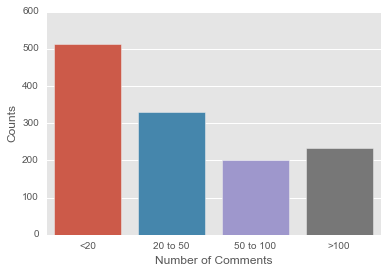

In [10]:
more_than_100_comments = df_titles_w_numbers[df_titles_w_numbers.number_of_comments > 100]

fifty_to_100_comments = df_titles_w_numbers[(df_titles_w_numbers.number_of_comments < 100) 
                                            & (df_titles_w_numbers.number_of_comments >=50)]

twenty_to_fifty_comments = df_titles_w_numbers[(df_titles_w_numbers.number_of_comments < 50) 
                                               & (df_titles_w_numbers.number_of_comments >=20)]

less_than_twenty_comments = df_titles_w_numbers[(df_titles_w_numbers.number_of_comments < 20)]



x = ['<20', '20 to 50', '50 to 100', '>100']
y = [len(less_than_twenty_comments), len(twenty_to_fifty_comments), len(fifty_to_100_comments), len(more_than_100_comments)]
ax = sns.barplot(x,y)
ax.set(xlabel = 'Number of Comments', ylabel= 'Counts')



## Frequency of words 

In [11]:
# Returns how many times a word appears in titles

def freq_of_words(df):

    # looks at each title in clean_title in data frame
    # and adds each word to the counter
    word_counter = []
    for title in df.clean_title:
        words = title.split()
        for i in words:
            word_counter.append(i)
 
    # appends words to a new data frame
    # counts how many times a word appears
    # and returns it as a data frame
    df_words = pd.DataFrame(word_counter)
    df_words.columns = ['appearances']
    return pd.DataFrame(df_words['appearances'].value_counts())



In [98]:
df_100 = pd.DataFrame(freq_of_words(more_than_100_comments))
df_100[:5]
df_50_100 = pd.DataFrame(freq_of_words(fifty_to_100_comments))
df_50_100[:5]
df_20_50 = pd.DataFrame(freq_of_words(twenty_to_fifty_comments))
df_20_50[:5]

,appearances
nba,51
game,33
would,28
team,26
season,25


In [44]:
df_100.index

Index(['nba', 'team', 'players', 'season', 'player', 'game', 'time', 'shaq',
       'year', 'would',
       ...
       'build', 'comment', 'concept', 'joke', 'knicks', 'charity', 'rajon',
       'dellavedova', 'competitor', 'wingspans'],
      dtype='object', length=1065)

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8,8))


y1 = df_100.appearances[:10]
y2 = df_50_100[:10]
y3 = df_20_50[:10]

y1.plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Top 10 words in titles with >100 comments')
y2.plot(kind='bar', ax = ax[1] )
ax[1].set_title('Top 10 words in titles with 50 to 100 comments')
y3.plot(kind = 'bar', ax = ax[2])
ax[2].set_title('Top 10 words in titles with 20 to 50 comments')


fig.tight_layout()



In [235]:
# Check to make sure not getting the same words and appearances

print(freq_of_words(more_than_100_comments)[:5])
print(freq_of_words(fifty_to_100_comments)[:5])
print(freq_of_words(twenty_to_fifty_comments)[:5])
print(freq_of_words(less_than_twenty_comments)[:5])

print(freq_of_words(df_titles_w_numbers)[:5])




         appearances
nba               49
team              29
players           20
season            17
player            17
         appearances
nba               42
season            22
team              19
players           17
player            17
        appearances
nba              51
game             33
would            28
team             26
season           25
        appearances
nba              95
game             55
vs               42
season           28
shaq             27
        appearances
nba             249
game            122
season           99
team             97
vs               81


In [237]:
###### Previous Code...turned it into function above 

# word_counter = []
# for title in clean_title:
#     words = title.split()
#     for i in words:
#         word_counter.append(i)
            
# # append to a new data frame
# df_words = pd.DataFrame(word_counter)
# df_words.columns = ['appearances']

# # get counts of words and make a new dataframe with it
# word_count = df_words['appearances'].value_counts()
# word_count = pd.DataFrame(word_count)
# word_count.head()

In [238]:
# total number of appearances of words
total_num_words = word_count.sum()

# number of unique words
len(word_count)


3291

In [28]:
# bin up by how many times a word appears
x = [20, 50, 100, 200, 300]
bins = {i:[] for i in x}

for i in bins:
    bins[i].append(word_count[word_count['appearances'] < i])



In [36]:
less_than_20_times = word_count[word_count['appearances'] < 20.0]
less_than_20_times[:10]

,appearances
playoff,19
knicks,19
magic,19
russell,19
rockets,18
greatest,18
trade,18
get,17
raptors,17
today,17


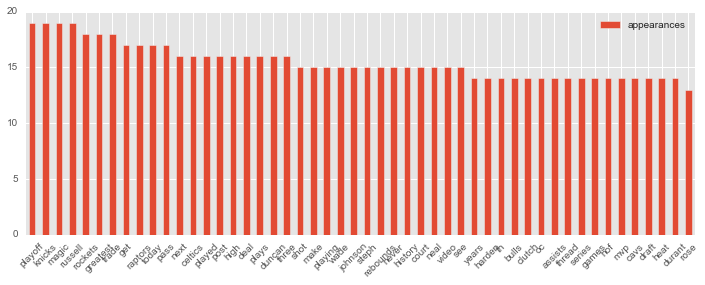

In [13]:
df_less_20 = pd.DataFrame(less_than_20_times)
df_less_20[:50].plot(kind = 'bar', figsize = (12,4), rot = 45 )

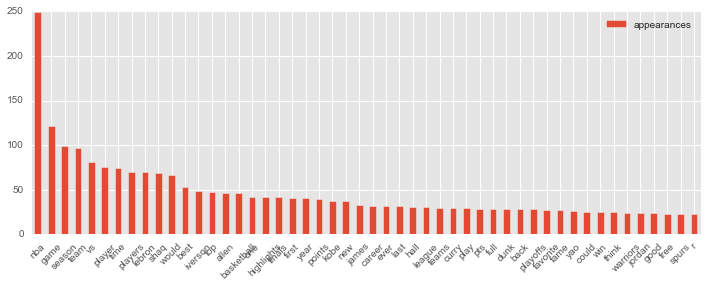

In [51]:
word_count[:50].plot(kind='bar', figsize = (12,4), rot = 45)